### Repositório do Projeto

O código-fonte completo deste projeto está disponível no GitHub no link abaixo: 

[Repositório no GitHub](https://github.com/ronaldobresende/wine-quality)

https://github.com/ronaldobresende/wine-quality

Ronaldo Barbosa Resende

# Módulo do Kaggle Intro to Machine Learning
Certificado de conclusão do módulo

![Certificado de Introdução ao Machine Learning - Kaggle](certificateintro-to-machine-learning-kaggle.png)

### Base de dados de vinhos verdes portugueses - Problema a Ser Resolvido

O objetivo deste projeto é criar um modelo de classificação como diferentes abordagnes de machile learning, como regressão logística, árvores de decisão e dvm para prever a qualidade dos vinhos com base em suas características químicas. A base de dados contém informações sobre vinhos brancos e tintos, e a variável alvo é a qualidade do vinho, que será transformada em uma variável binária (bom ou ruim).


### Diferença entre Regressão Linear e Regressão Logística

- **Regressão Linear**: É usada para prever um valor contínuo. A relação entre a variável dependente e as variáveis independentes é modelada como uma linha reta.
- **Regressão Logística**: É usada para prever um valor categórico (binário). A relação entre a variável dependente e as variáveis independentes é modelada usando a função logística (sigmoide), que mapeia os valores para uma probabilidade entre 0 e 1.

# Importar Bibliotecas Necessárias
Importar as bibliotecas necessárias, incluindo pandas, numpy, scikit-learn, etc.

In [1]:
# Importar Bibliotecas Necessárias

import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from IPython.display import Markdown
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import StandardScaler

# Configurar estilo dos gráficos
sns.set_style("whitegrid")

# Exibir todas as colunas do DataFrame
pd.set_option('display.max_columns', None)

# Ignorar warnings
warnings.filterwarnings('ignore')

# Carregar os Dados


In [2]:
# Carregar e Preparar os Dados

# Carregar o dataset
df = pd.read_csv('..\\dataset\\winequalityN.csv')

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


# Identificar quais são as variáveis presentes na base, os tipos de variáveis (discreta, categórica, contínua), as médias e desvios padrões

In [3]:
# Função para determinar o tipo de variável
def determinar_tipo_variavel(df):
    tipos_variaveis = {}
    for coluna in df.columns:
        if df[coluna].dtype == 'object' or df[coluna].dtype.name == 'category':
            tipos_variaveis[coluna] = 'Categórica'
        elif df[coluna].dtype in ['int64', 'float64']:
            num_valores_unicos = df[coluna].nunique()
            if num_valores_unicos < 20:  # Limite arbitrário para considerar uma variável como discreta
                tipos_variaveis[coluna] = 'Discreta'
            else:
                tipos_variaveis[coluna] = 'Contínua'
        else:
            tipos_variaveis[coluna] = 'Outro'
    return tipos_variaveis

# Determinar o tipo de cada variável
tipos_variaveis = determinar_tipo_variavel(df)

for coluna, tipo in tipos_variaveis.items():
    print(f'{coluna}: {tipo}')

# # Descrever as Variáveis
print("### Estatísticas Descritivas do Dataset")
display(df.describe())

type: Categórica
fixed acidity: Contínua
volatile acidity: Contínua
citric acid: Contínua
residual sugar: Contínua
chlorides: Contínua
free sulfur dioxide: Contínua
total sulfur dioxide: Contínua
density: Contínua
pH: Contínua
sulphates: Contínua
alcohol: Contínua
quality: Discreta
### Estatísticas Descritivas do Dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Análise Exploratória de Dados

### Verificação de Valores Ausentes


type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

### Distribuição das Variáveis Numéricas


<Figure size 1500x1000 with 0 Axes>

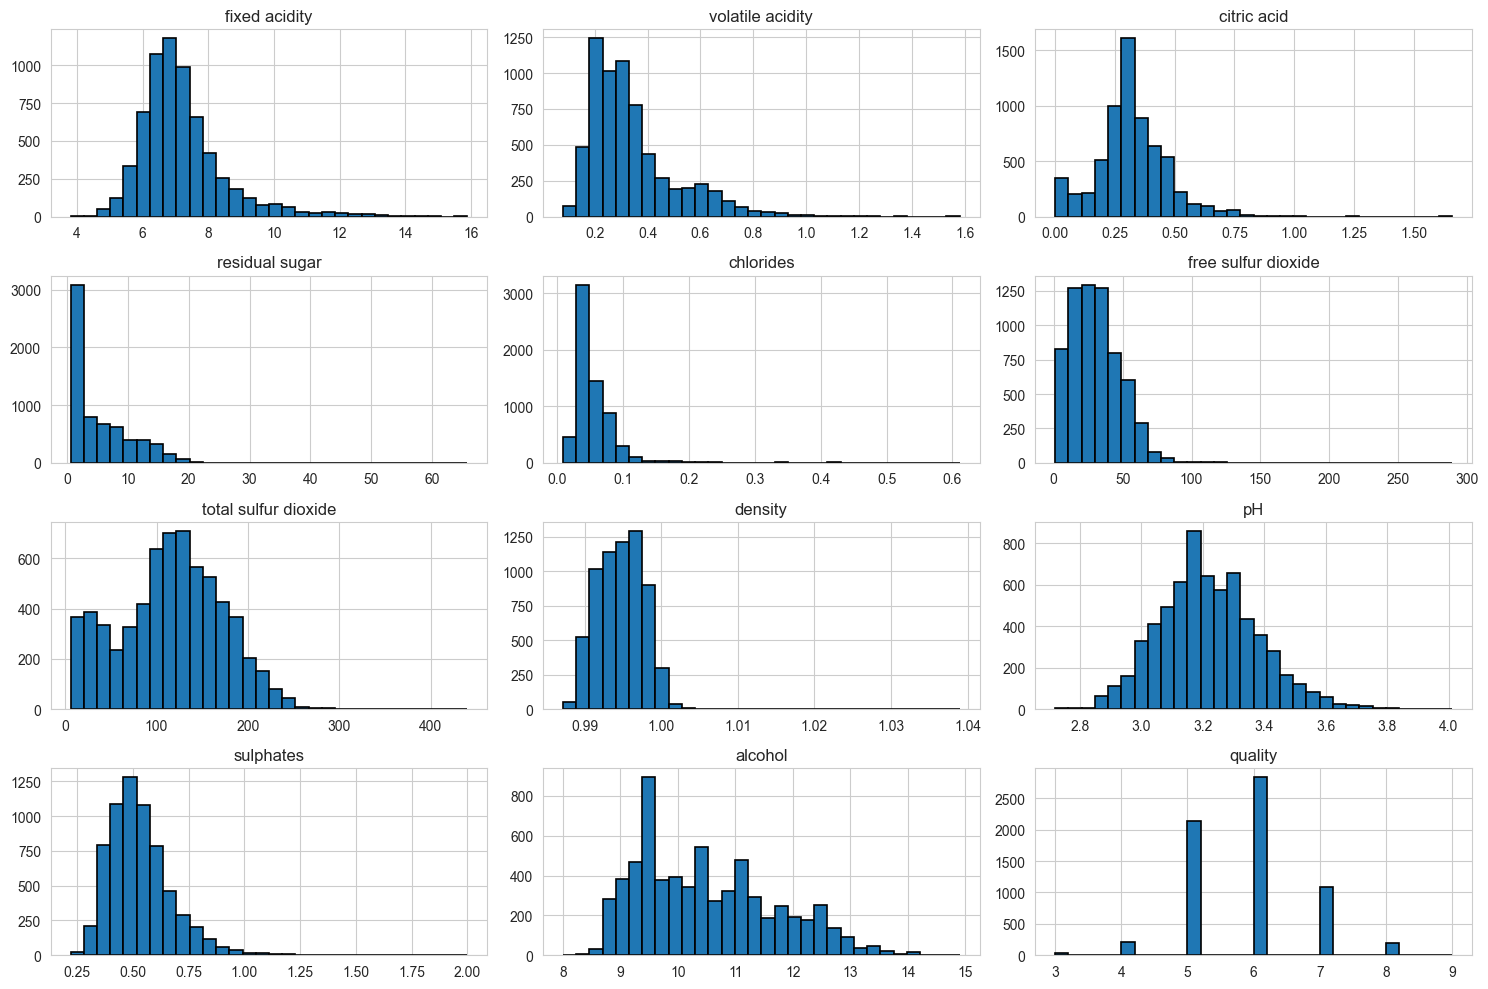

In [4]:
print("### Verificação de Valores Ausentes")
display(df.isnull().sum())

# Visualizando a distribuição das variáveis numéricas
print("### Distribuição das Variáveis Numéricas")
plt.figure(figsize=(15, 10))
df.hist(bins=30, edgecolor='black', linewidth=1.2, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Preparar os dados para classificação
Filtrar apenas os vinhos brancos, criar a variável 'opinion', e descartar as variáveis 'quality' e 'type' e tratar valores ausentes e dupliados

In [5]:
def prepare_data(type_wine):
    # # Filtrar apenas os vinhos brancos
    df_wine = df[df['type'] == type_wine]

    # # Criar a variável 'opinion'
    df_wine['opinion'] = np.where(df_wine['quality'] <= 5, 0, 1)

    # # Descartar a variável 'quality'A
    df_wine = df_wine.drop(columns=['quality'])

    # # Descartar a variável 'type, já que só vamos trabalhar com vinhos brancos'
    df_wine = df_wine.drop(columns=['type'])

    # Imputar valores ausentes com a média das colunas
    imputer = SimpleImputer(strategy='mean')
    df_wine = pd.DataFrame(imputer.fit_transform(df_wine), columns=df_wine.columns)

    # Verificar o dataset após o tratamento
    print("### Verificação de Valores Ausentes")
    print(df_wine.isnull().sum())
    print(f"Número de linhas duplicadas: {df_wine.duplicated().sum()}")

    return df_wine

# Etapas para Criar um Modelo de Classificação Eficiente
Descrever as etapas necessárias para criar um modelo de classificação eficiente.

In [6]:
# Etapas para Criar um Modelo de Classificação Eficiente

etapas_md = """
### Etapas para Criar um Modelo de Classificação Eficiente

1. **Entendimento do Problema**
   - Definir o objetivo do modelo de classificação.
   - Identificar as variáveis independentes (features) e a variável dependente (target).

2. **Coleta e Preparação dos Dados**
   - Carregar o dataset.
   - Filtrar os dados relevantes (neste caso, apenas vinhos brancos).
   - Criar a variável categórica 'opinion' baseada na variável 'quality'.
   - Descartar a variável 'quality' após a criação da variável 'opinion'.
   - Tratar valores ausentes, se houver.
   - Normalizar ou padronizar os dados, se necessário.

3. **Análise Exploratória dos Dados (EDA)**
   - Analisar a distribuição das variáveis.
   - Identificar possíveis correlações entre as variáveis.
   - Visualizar os dados usando gráficos.

4. **Divisão dos Dados**
    - Utilizar validação cruzada para avaliar o desempenho do modelo.

5. **Treinamento do Modelo**
   - Escolher algoritmos de classificação adequados (Regressão Logística, Árvore de Decisão, SVM).
  
6. **Avaliação do Modelo**
   - Avaliar o desempenho dos modelos usando métricas como acurácia, precisão, recall e f1-score.
   - Utilizar validação cruzada estratificada com k-folds (k=10) para obter uma avaliação mais robusta.

7. **Comparação de Modelos**
   - Comparar o desempenho dos diferentes modelos treinados.
   - Utilizar a curva ROC e a área sob a curva (AUC) para comparar os modelos.

8. **Seleção do Melhor Modelo**
    - Selecionar o modelo com melhor desempenho para a tarefa de classificação.
    - Justificar a escolha do modelo baseado nas métricas de avaliação.

9. **Inferência em Novos Dados**
    - Utilizar o modelo selecionado para fazer previsões em novos dados (neste caso, vinhos tintos).
    - Avaliar se o modelo funciona bem para os novos dados e justificar a análise.
"""

display(Markdown(etapas_md))


### Etapas para Criar um Modelo de Classificação Eficiente

1. **Entendimento do Problema**
   - Definir o objetivo do modelo de classificação.
   - Identificar as variáveis independentes (features) e a variável dependente (target).

2. **Coleta e Preparação dos Dados**
   - Carregar o dataset.
   - Filtrar os dados relevantes (neste caso, apenas vinhos brancos).
   - Criar a variável categórica 'opinion' baseada na variável 'quality'.
   - Descartar a variável 'quality' após a criação da variável 'opinion'.
   - Tratar valores ausentes, se houver.
   - Normalizar ou padronizar os dados, se necessário.

3. **Análise Exploratória dos Dados (EDA)**
   - Analisar a distribuição das variáveis.
   - Identificar possíveis correlações entre as variáveis.
   - Visualizar os dados usando gráficos.

4. **Divisão dos Dados**
    - Utilizar validação cruzada para avaliar o desempenho do modelo.

5. **Treinamento do Modelo**
   - Escolher algoritmos de classificação adequados (Regressão Logística, Árvore de Decisão, SVM).
  
6. **Avaliação do Modelo**
   - Avaliar o desempenho dos modelos usando métricas como acurácia, precisão, recall e f1-score.
   - Utilizar validação cruzada estratificada com k-folds (k=10) para obter uma avaliação mais robusta.

7. **Comparação de Modelos**
   - Comparar o desempenho dos diferentes modelos treinados.
   - Utilizar a curva ROC e a área sob a curva (AUC) para comparar os modelos.

8. **Seleção do Melhor Modelo**
    - Selecionar o modelo com melhor desempenho para a tarefa de classificação.
    - Justificar a escolha do modelo baseado nas métricas de avaliação.

9. **Inferência em Novos Dados**
    - Utilizar o modelo selecionado para fazer previsões em novos dados (neste caso, vinhos tintos).
    - Avaliar se o modelo funciona bem para os novos dados e justificar a análise.


# Treinar e avaliar os Modelos
Treinar e avaliar o modelo usando validação cruzada estratificada com k-folds (k=10).

In [7]:
def evaluate_model(model, features, target, cv):
    # Obter a acurácia dos modelos obtidos
    accuracy_scores = cross_val_score(model, features, target, cv=cv, scoring='accuracy')
    # Obter o precisão dos modelos obtidos
    precision_scores = cross_val_score(model, features, target, cv=cv, scoring='precision')
    # Obter o recall dos modelos obtidos
    recall_scores = cross_val_score(model, features, target, cv=cv, scoring='recall')
    # Obter o f1-score dos modelos obtidos
    f1_scores = cross_val_score(model, features, target, cv=cv, scoring='f1')

    # Calcular a média e desvio padrão das métricas
    accuracy_mean = np.mean(accuracy_scores)
    accuracy_std = np.std(accuracy_scores)
    precision_mean = np.mean(precision_scores)
    precision_std = np.std(precision_scores)
    recall_mean = np.mean(recall_scores)
    recall_std = np.std(recall_scores)
    
    f1_mean = np.mean(f1_scores)
    f1_std = np.std(f1_scores)

    # Exibir os resultados d
    print(f"Média e desvio padrão da Acurácia: {accuracy_mean:.4f} ± {accuracy_std:.4f}")
    print(f"Média e desvio padrão da da Precisão: {precision_mean:.4f} ± {precision_std:.4f}")
    print(f"Média e desvio padrão da do Recall: {recall_mean:.4f} ± {recall_std:.4f}")
    print(f"Média e desvio padrão da do F1-Score: {f1_mean:.4f} ± {f1_std:.4f}")

    # Retornar o modelo ajustado
    return model


# Obter os dados preparados para os vinhos brancos

In [8]:
#Obter os dados preparados para os vinhos brancos
df_white = prepare_data('white')
df_white.head

### Verificação de Valores Ausentes
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
opinion                 0
dtype: int64
Número de linhas duplicadas: 928


<bound method NDFrame.head of       fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0          0.270000         0.36            20.7      0.045   
1               6.3          0.300000         0.34             1.6      0.049   
2               8.1          0.280000         0.40             6.9      0.050   
3               7.2          0.230000         0.32             8.5      0.058   
4               7.2          0.230000         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2          0.210000         0.29             1.6      0.039   
4894            6.6          0.320000         0.36             8.0      0.047   
4895            6.5          0.278252         0.19             1.2      0.041   
4896            5.5          0.290000         0.30             1.1      0.022   
4897            6.0          0.210000         0.38             0.8      0.020  

# Criar, treinar e avaliar os modelos para os vinhos brancos
Treinar um modelo de Regressão Logística, Árvore de decisão e SVM, usando validação cruzada estratificada com k-folds (k=10).

In [9]:
# Separar as features e o target
X = df_white.drop(columns=['opinion'])
y = df_white['opinion']

# Configurar a validação cruzada estratificada com k-folds (k=10)
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

models = {
    "Regressão Logística": (LogisticRegression(max_iter=1000, random_state=42)),
    "Árvore de decisão": (DecisionTreeClassifier(random_state=42)),
    "Support Vector Machine": (SVC(kernel='linear', random_state=42,probability=True))
}

for name, model in models.items():
    print(name)
    evaluate_model(model, X, y, kf)
    print("\n")


Regressão Logística
Média e desvio padrão da Acurácia: 0.7470 ± 0.0142
Média e desvio padrão da da Precisão: 0.7749 ± 0.0167
Média e desvio padrão da do Recall: 0.8745 ± 0.0175
Média e desvio padrão da do F1-Score: 0.8214 ± 0.0089


Árvore de decisão
Média e desvio padrão da Acurácia: 0.7942 ± 0.0248
Média e desvio padrão da da Precisão: 0.8473 ± 0.0166
Média e desvio padrão da do Recall: 0.8425 ± 0.0312
Média e desvio padrão da do F1-Score: 0.8447 ± 0.0202


Support Vector Machine
Média e desvio padrão da Acurácia: 0.7511 ± 0.0128
Média e desvio padrão da da Precisão: 0.7698 ± 0.0102
Média e desvio padrão da do Recall: 0.8932 ± 0.0232
Média e desvio padrão da do F1-Score: 0.8267 ± 0.0102




# Comparar Modelos e Escolher o Melhor
Comparar os modelos treinados e escolher o melhor baseado na curva ROC média.

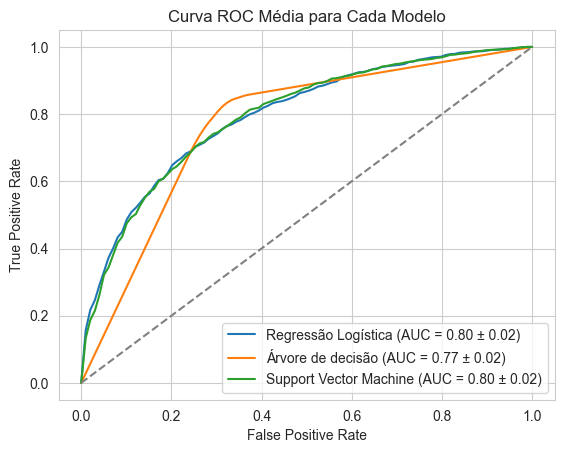

O melhor modelo baseado na AUC média é: Regressão Logística com AUC = 0.80


In [10]:
mean_auc_dict = {}
colors = ['blue', 'green', 'red', 'orange']  # Diferentes cores para cada modelo

for nome_modelo, modelo in models.items():
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for train, test in kf.split(X, y):
        modelo.fit(X.iloc[train], y.iloc[train])
        probas_ = modelo.predict_proba(X.iloc[test])

        fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    
    mean_auc_dict[nome_modelo] = mean_auc  # Armazenar a AUC média no dicionário
    
    plt.plot(mean_fpr, mean_tpr, label=f'{nome_modelo} (AUC = {mean_auc:.2f} ± {std_auc:.2f})')
    
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Média para Cada Modelo')
plt.legend(loc='lower right')
plt.show()

# Escolha o melhor modelo com base na AUC média
best_model = max(mean_auc_dict, key=mean_auc_dict.get)
print(f'O melhor modelo baseado na AUC média é: {best_model} com AUC = {mean_auc_dict[best_model]:.2f}')

# Inferência com Dados de Vinho Tinto
Usar o melhor modelo para inferir a qualidade dos vinhos tintos e comparar o desempenho.

In [11]:
#Obter os dados preparados para os vinhos tintos
df_red = prepare_data('red')

### Verificação de Valores Ausentes
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
opinion                 0
dtype: int64
Número de linhas duplicadas: 240


In [12]:
# Inferência com Dados de Vinho Tinto

# Separar as features e o target
X = df_red.drop(columns=['opinion'])
y = df_red['opinion']

# Usar o melhor modelo para inferir a qualidade dos vinhos tintos
model = models.get(best_model, None)
print(f"Usando o modelo {model} para inferir a qualidade dos vinhos tintos...")
y_pred_red = model.predict(X)

# Calcular a quantidade de vinhos bons6 e ruins
vinhos_bons = np.sum(y_pred_red)
vinhos_ruins = len(y_pred_red) - vinhos_bons

# Exibir os resultados
print(f"Quantidade de vinhos bons: {vinhos_bons}")
print(f"Quantidade de vinhos ruins: {vinhos_ruins}")

# Resultados em markdown
resultados_inferencia_md = f"""
### Inferência com Dados de Vinho Tinto

- **Quantidade de vinhos bons:** {vinhos_bons}
- **Quantidade de vinhos ruins:** {vinhos_ruins}
"""

display(Markdown(resultados_inferencia_md))

# Avaliar o desempenho do modelo nos dados de vinho tinto
accuracy_red = accuracy_score(y, y_pred_red)
precision_red = precision_score(y, y_pred_red)
recall_red = recall_score(y, y_pred_red)
f1_red = f1_score(y, y_pred_red)

# Exibir os resultados
print(f"Acurácia: {accuracy_red:.4f}")
print(f"Precisão: {precision_red:.4f}")
print(f"Recall: {recall_red:.4f}")
print(f"F1-Score: {f1_red:.4f}")

# Justificar se o modelo funciona bem para os dados de vinho tinto
justificativa_md = """
### Justificativa

O modelo não funciona da mesma forma para as bases de vinhos brancos e tintos 
devido às diferenças nas características químicas, distribuição dos dados, possível desequilíbrio nas classes. 
Essas diferenças fazem com que o modelo tenha um desempenho significativamente pior ao classificar vinhos tintos.
dado que o modelo foi treinado com base nos vinhos brancos.
"""

display(Markdown(justificativa_md))

Usando o modelo LogisticRegression(max_iter=1000, random_state=42) para inferir a qualidade dos vinhos tintos...
Quantidade de vinhos bons: 490.0
Quantidade de vinhos ruins: 1109.0



### Inferência com Dados de Vinho Tinto

- **Quantidade de vinhos bons:** 490.0
- **Quantidade de vinhos ruins:** 1109.0


Acurácia: 0.6742
Precisão: 0.8408
Recall: 0.4819
F1-Score: 0.6126



### Justificativa

O modelo não funciona da mesma forma para as bases de vinhos brancos e tintos 
devido às diferenças nas características químicas, distribuição dos dados, possível desequilíbrio nas classes. 
Essas diferenças fazem com que o modelo tenha um desempenho significativamente pior ao classificar vinhos tintos.
dado que o modelo foi treinado com base nos vinhos brancos.
